### РОССИЙСКИЙ УНИВЕРСИТЕТ ДРУЖБЫ НАРОДОВ

#### Факультет физико-математических и естественных наук  
#### Кафедра информационных технологий 

## ОТЧЕТ ПО ЛАБОРАТОРНОЙ РАБОТЕ №1

#### Дисциплина: Интеллектуальный анализ данных

##### Студент:  Николаев Александр Викторович
##### Группа:   НФИбд-01-17

## Москва 2020
***

### Вариант №1

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

#### Задание 1

1. Построим два распределения с.в. x и y на основе средних значений и матрицы ковариации

In [2]:
n = 100
a = [-1, -1]
r = [[1, 0.5], [0.5, 2]]
x, y = np.random.multivariate_normal(mean=a, cov=r, size=n).T

2. Выведем мат. ожидания и дисперсии с.в., а также корреляцию между ними

In [3]:
print(f'Математическое ожидание X = {x.mean()}')
print(f'Математическое ожидание Y = {y.mean()}')
print(f'Дисперсия (несмещенная) X = {x.var(ddof=1)}') # несмещенная дисперсия
print(f'Дисперсия (несмещенная) Y = {y.var(ddof=1)}')
print(f'Корреляция между X и Y = {np.corrcoef(x, y)[0, 1]}')

Математическое ожидание X = -0.9660098887055507
Математическое ожидание Y = -1.1590578218220915
Дисперсия (несмещенная) X = 1.0888794310355603
Дисперсия (несмещенная) Y = 1.5094901512948296
Корреляция между X и Y = 0.4789655336743657


3. Построим диаграмму рассеивания наших с.в., а также выделим красным крестиком точку с координатами средних значений

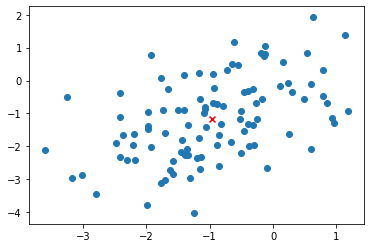

In [4]:
plt.scatter(x, y)
plt.scatter(x.mean(), y.mean(), c='r', marker='x')
plt.show()

#### Задание 2

1. Считаем датасет Annealing Data Set

In [5]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/annealing/anneal.data'
data = pd.read_csv(url, header=None, prefix='V')
data.replace('?', np.nan, inplace=True)

2. Проведем небольшое исследование данных

Найдем категориальный признаки и числовые. Удалим колонки, состоящие из одних только пропущенных значений.

In [6]:
numeric_features = []
cat_features = []
nan_cols = []
for col in data.columns:
    if data[col].isna().sum() == data.shape[0]:
        nan_cols.append(col)
    elif pd.api.types.is_numeric_dtype(data[col]):
        numeric_features.append(col)
    else:
        cat_features.append(col)

In [7]:
print(f'Признаки, которые полностью пропущены: {nan_cols}, количество = {len(nan_cols)}')
print(f'Числовые признаки: {numeric_features}, количество = {len(numeric_features)}')
print(f'Категориальные признаки: {cat_features}, количество = {len(cat_features)}')

Признаки, которые полностью пропущены: ['V18', 'V22', 'V25', 'V28', 'V29', 'V30'], количество = 6
Числовые признаки: ['V3', 'V4', 'V8', 'V32', 'V33', 'V34', 'V36'], количество = 7
Категориальные признаки: ['V0', 'V1', 'V2', 'V5', 'V6', 'V7', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V19', 'V20', 'V21', 'V23', 'V24', 'V26', 'V27', 'V31', 'V35', 'V37', 'V38'], количество = 26


In [8]:
data.drop(columns=nan_cols, inplace=True)

3. Найдем числовой признак с наибольшей дисперсии и построим для него CDF

In [9]:
max_var_feat = numeric_features[data[numeric_features].var().argmax()]
print(f'Числовой признак с наибольшей дисперсией: {max_var_feat}, дисперсия = {data[numeric_features].var().max()}')

Числовой признак с наибольшей дисперсией: V34, дисперсия = 3559894.008622569


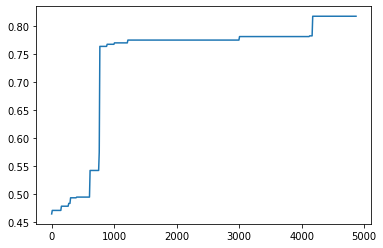

In [10]:
# def ECDF(data, x):
#     counter = 0
#     for v in data:
#         if v <= x:
#             counter += 1
#     return counter / len(data)

# npoints = 500
# samples = data[max_var_feat]
# xlist = [samples.min() + (samples.max() - samples.min()) * i / npoints
#         for i in range(npoints)]
# ylist = [ECDF(samples, x) for x in xlist]
# plt.plot(xlist, ylist);

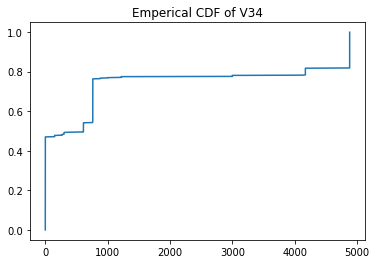

In [11]:
xlist = np.sort(samples)
ylist = np.arange(len(xlist)) / float(len(xlist))
plt.plot(xlist, ylist)
plt.title(f'Emperical CDF of {max_var_feat}');

4. Найдем числово признак, наименее коррелированный с предыдущим

In [12]:
print('Корреляция между признаками и признаком V34:\n', data[numeric_features].corr()[max_var_feat], sep='')

Корреляция между признаками и признаком V34:
V3    -0.135093
V4    -0.107630
V8    -0.042030
V32   -0.087135
V33    0.129924
V34    1.000000
V36   -0.152613
Name: V34, dtype: float64


In [13]:
min_corr_idx = min(enumerate(data[numeric_features].corr()[max_var_feat]), key=lambda x: abs(x[1]))[0]
min_corr_feat = numeric_features[min_corr_idx]
min_corr = data[numeric_features].corr()[max_var_feat][min_corr_idx]
print(f'Наименее кореллированный признак: {min_corr_feat}, корреляция = {min_corr}')

Наименее кореллированный признак: V8, корреляция = -0.042030017146262505


5. Построим для него PDF

Text(0.5, 1.0, 'Emperical PDF of V8')

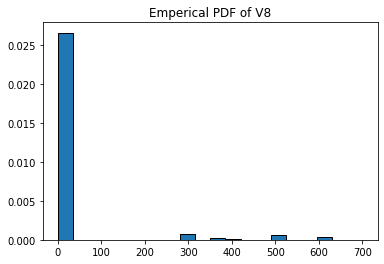

In [14]:
plt.hist(data[min_corr_feat], edgecolor = 'black',
         bins = 20, density=True)
plt.title(f'Emperical PDF of {min_corr_feat}')

6. Выведим для указанных выше признаком мат. ожидания, дисперсию и корреляцию между ними

In [15]:
print(f'Математическое ожидание {max_var_feat} = {data[max_var_feat].mean()}')
print(f'Математическое ожидание {min_corr_feat} = {data[min_corr_feat].mean()}')
print(f'Дисперсия (несмещенная) {max_var_feat} = {data[max_var_feat].var(ddof=1)}') # несмещенная дисперсия
print(f'Дисперсия (несмещенная) {min_corr_feat} = {data[min_corr_feat].var(ddof=1)}')
print(f'Корреляция между {max_var_feat} и {min_corr_feat} = {np.corrcoef(data[max_var_feat], data[min_corr_feat])[0, 1]}')

Математическое ожидание V34 = 1273.0375939849623
Математическое ожидание V8 = 30.852130325814535
Дисперсия (несмещенная) V34 = 3559894.008622569
Дисперсия (несмещенная) V8 = 13352.096049408181
Корреляция между V34 и V8 = -0.04203001714626174
